In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
data = sns.load_dataset('planets')
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


####The dataset contains 1035 rows in total. We have Null values in datset

In [ ]:
data.isnull().sum()

,0
method,0
number,0
orbital_period,43
mass,522
distance,227
year,0


In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0
orbital_period,43
mass,522
distance,227


In [ ]:
data['orbital_period'] = data['orbital_period'].fillna(data['orbital_period'].mean())

In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0
mass,522
distance,227


In [ ]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0
mass,522
distance,227


In [ ]:
data['mass'] = data['mass'].fillna(data['mass'].mean())

In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0
distance,227


In [ ]:
data['distance'] = data['distance'].fillna(data['distance'].median())

In [ ]:
data.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
data.isnull().sum()[data.isnull().sum()>0]

,0


<Axes: xlabel='orbital_period', ylabel='distance'>

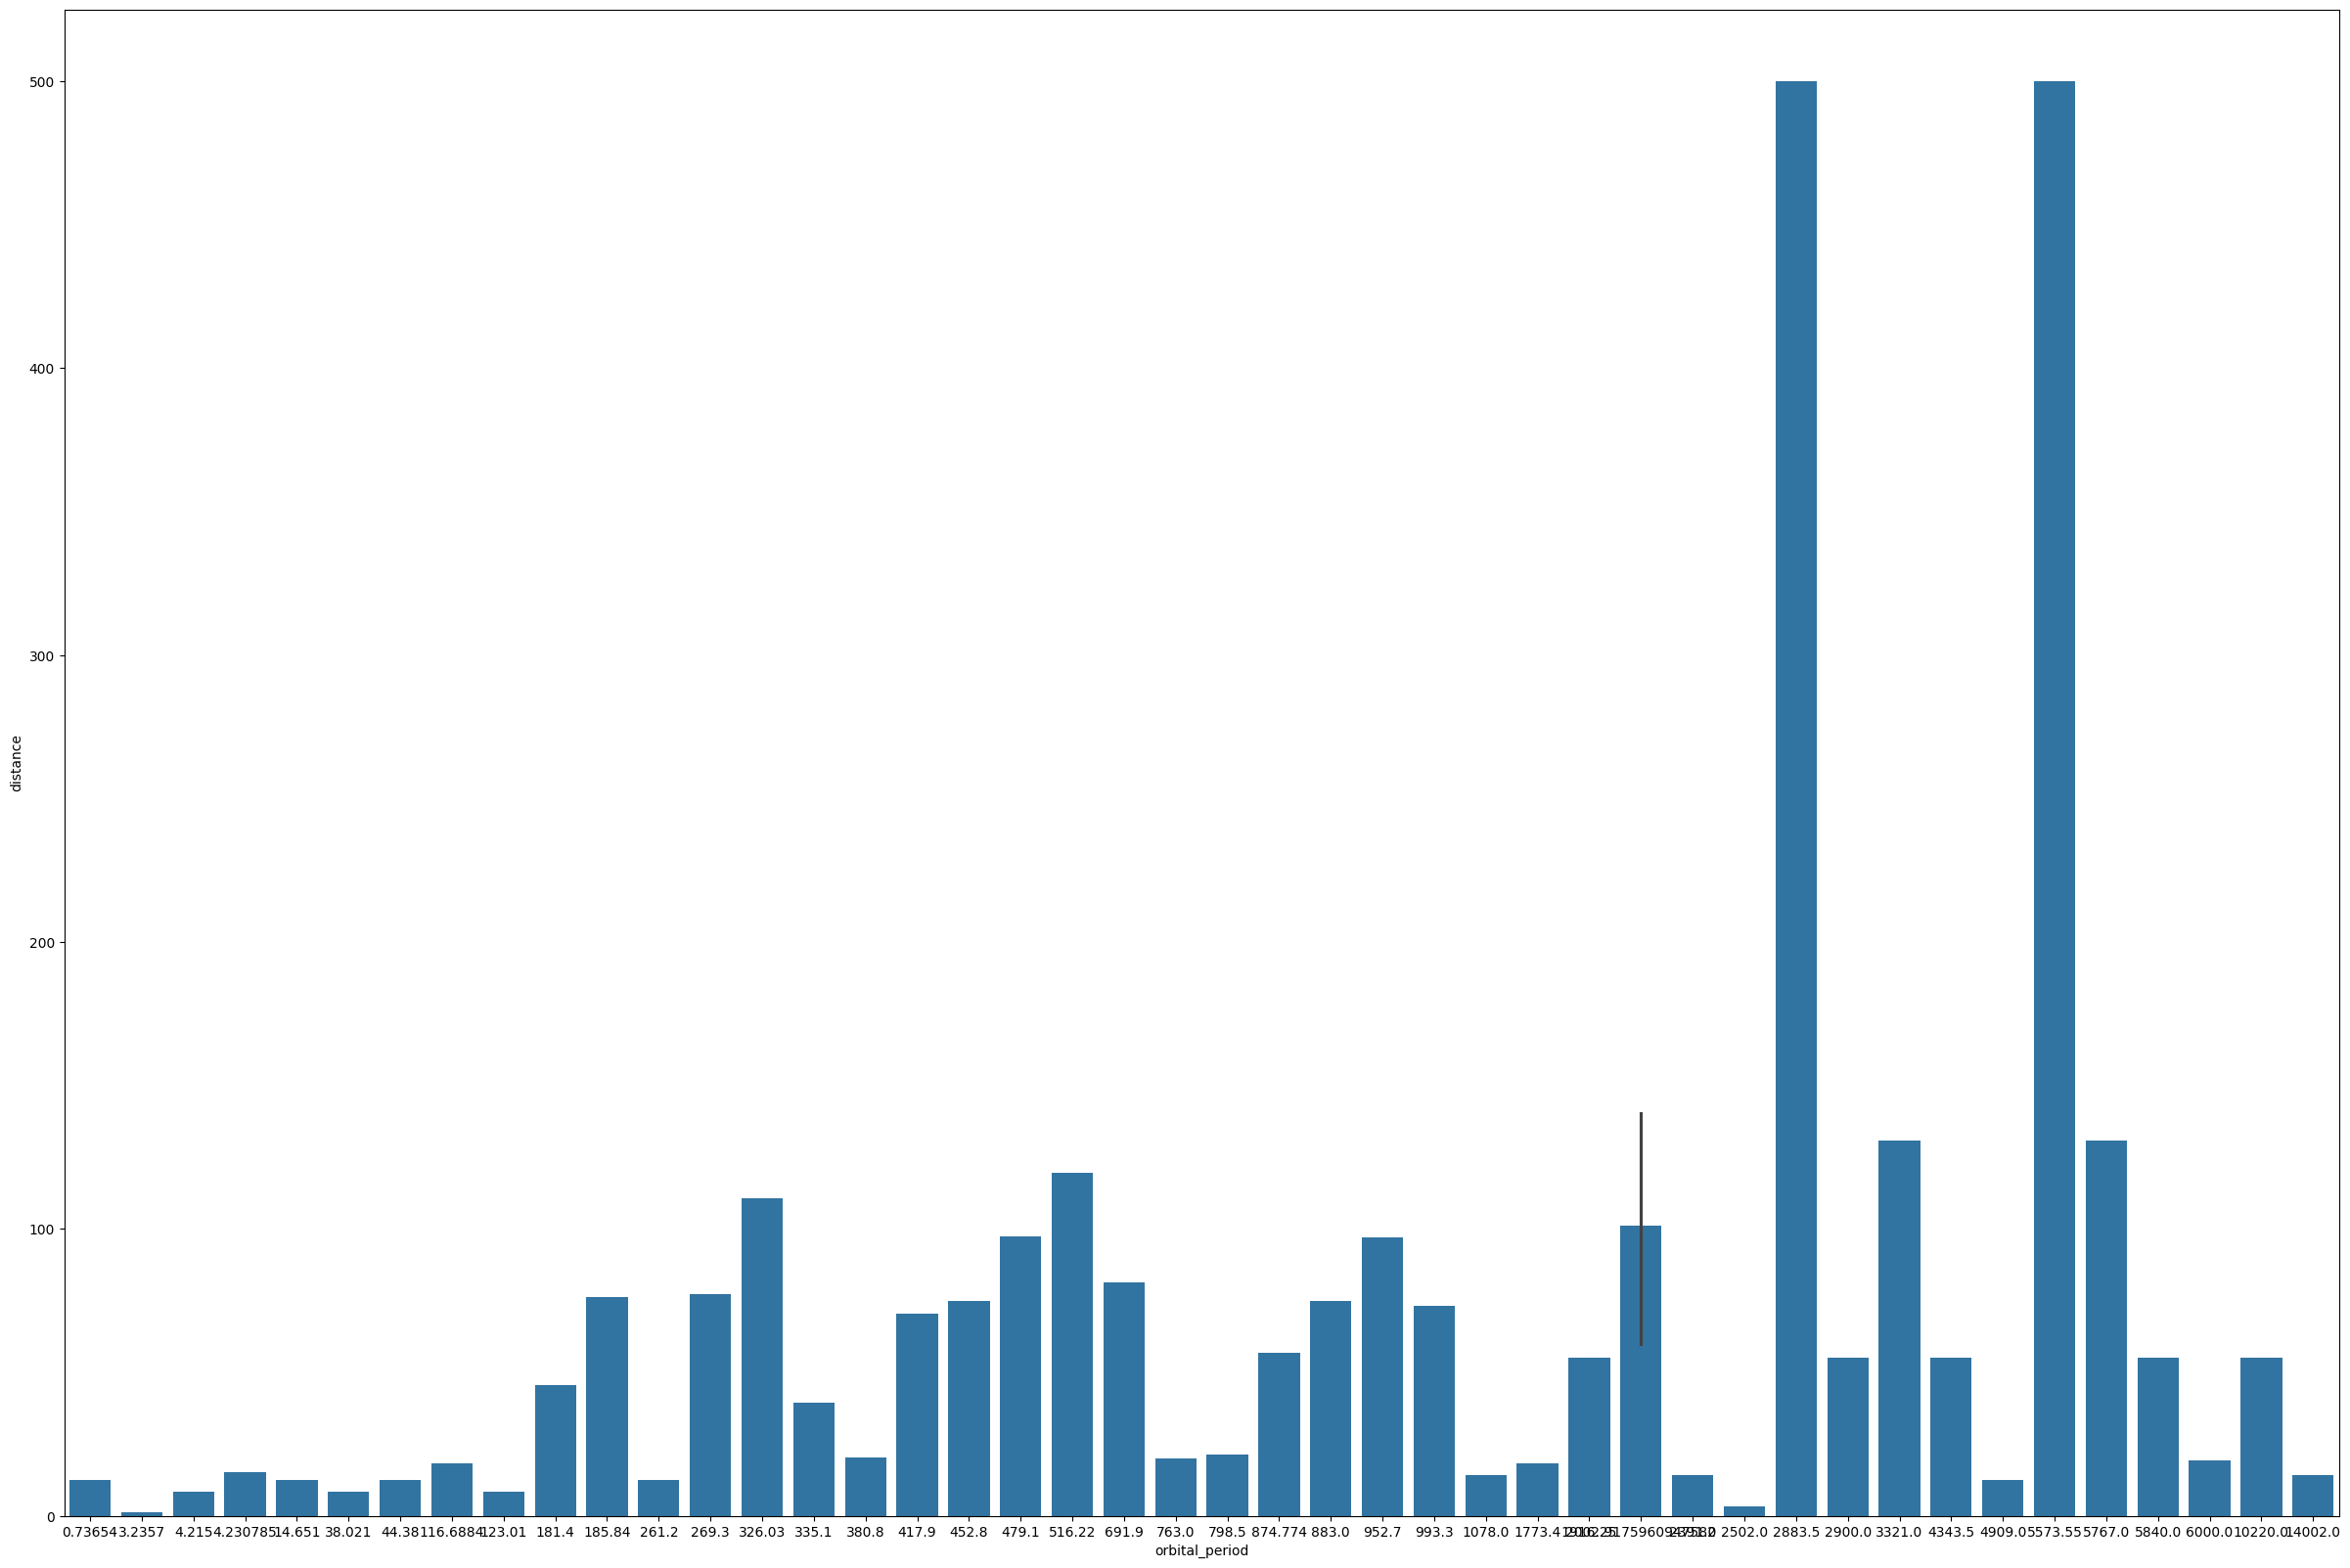

In [ ]:
plt.figure(figsize=(30, 20))
sns.barplot(data=data[:50], x='orbital_period',y='distance')

In [ ]:
from scipy.stats import zscore
data['Z-score'] = zscore(data['orbital_period'])
data['Z-score']

,Z-score
0,-0.068103
1,-0.044318
2,-0.048709
3,-0.065875
4,-0.058403
...,...
1030,-0.078527
1031,-0.078580
1032,-0.078557
1033,-0.078520


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
number,1035.0,1.785507e+00,1.240976,1.000000,1.000000,1.000000,2.000000,7.000000
orbital_period,1035.0,2.002918e+03,25468.059298,0.090706,5.747860,49.532000,673.550000,730000.000000
mass,1035.0,2.638161e+00,2.687081,0.003600,1.285000,2.638161,2.638161,25.000000
distance,1035.0,2.182703e+02,653.407624,1.350000,38.010000,55.250000,130.720000,8500.000000
year,1035.0,2.009071e+03,3.972567,1989.000000,2007.000000,2010.000000,2012.000000,2014.000000
Z-score,1035.0,-1.373029e-17,1.000483,-0.078679,-0.078457,-0.076737,-0.052223,28.598529


In [ ]:
outliers = data[data['Z-score'].abs() > 3]
print(outliers)

      method  number  orbital_period      mass  distance  year    Z-score
68   Imaging       1        318280.0  2.638161      7.69  2008  12.424582
643  Imaging       4        170000.0  2.638161     39.94  2008   6.599572
937  Imaging       1        730000.0  2.638161     55.25  2006  28.598529


In [ ]:
data_orbital = pd.DataFrame(outliers)

#### Once identified, outliers can be treated in several ways:
1) Removal (Dropping/Trimming): Best for outliers caused by clear data entry errors, measurement errors, or other data collection mistakes.

2) Imputation (Replacing Values):Replace with Central Tendency: Substitute outlier values with the median (which is robust to extreme values) or mean of the dataset.

3) Cap/Winsorize: Replace extreme values with a specified maximum or minimum value (a threshold), effectively bringing them within the typical range.


#### Data Transformation:
1)  Apply a function (e.g., logarithmic, square root, or inverse transformation) to the entire dataset.
2) This can reduce the influence of outliers by changing the data's scale, making it more suitable for certain statistical methods and analyses.

In [ ]:
# Apply natural logarithm transformation
data['Log_Value'] = np.log(data['orbital_period'])
#data['Log_Value'] = np.log(data_orbital)
# Apply base-10 logarithm transformation
data['Log_Value_Base10'] = np.log10(data['orbital_period'])

print("Original Data and Logarithmic Transformations:")
print(data.head())

Original Data and Logarithmic Transformations:
            method  number  orbital_period   mass  distance  year   Z-score  \
0  Radial Velocity       1         269.300   7.10     77.40  2006 -0.068103   
1  Radial Velocity       1         874.774   2.21     56.95  2008 -0.044318   
2  Radial Velocity       1         763.000   2.60     19.84  2011 -0.048709   
3  Radial Velocity       1         326.030  19.40    110.62  2007 -0.065875   
4  Radial Velocity       1         516.220  10.50    119.47  2009 -0.058403   

   Log_Value  Log_Value_Base10  
0   5.595826          2.430236  
1   6.773966          2.941896  
2   6.637258          2.882525  
3   5.786989          2.513258  
4   6.246533          2.712835  


In [ ]:
# Apply square root transformation
data['Sqrt_Count'] = np.sqrt(data['orbital_period'])

print("\nOriginal Data and Square Root Transformation:")
print(data.head())


Original Data and Square Root Transformation:
            method  number  orbital_period   mass  distance  year   Z-score  \
0  Radial Velocity       1         269.300   7.10     77.40  2006 -0.068103   
1  Radial Velocity       1         874.774   2.21     56.95  2008 -0.044318   
2  Radial Velocity       1         763.000   2.60     19.84  2011 -0.048709   
3  Radial Velocity       1         326.030  19.40    110.62  2007 -0.065875   
4  Radial Velocity       1         516.220  10.50    119.47  2009 -0.058403   

   Log_Value  Log_Value_Base10  Sqrt_Count  
0   5.595826          2.430236   16.410363  
1   6.773966          2.941896   29.576579  
2   6.637258          2.882525   27.622455  
3   5.786989          2.513258   18.056301  
4   6.246533          2.712835   22.720475  


In [ ]:
# Apply inverse transformation
data['Inverse_method'] = 1 / data['orbital_period']

print("\nOriginal Data and Inverse Transformation:")
print(data.head())


Original Data and Inverse Transformation:
            method  number  orbital_period   mass  distance  year   Z-score  \
0  Radial Velocity       1         269.300   7.10     77.40  2006 -0.068103   
1  Radial Velocity       1         874.774   2.21     56.95  2008 -0.044318   
2  Radial Velocity       1         763.000   2.60     19.84  2011 -0.048709   
3  Radial Velocity       1         326.030  19.40    110.62  2007 -0.065875   
4  Radial Velocity       1         516.220  10.50    119.47  2009 -0.058403   

   Log_Value  Log_Value_Base10  Sqrt_Count  Inverse_Time  Inverse_method  
0   5.595826          2.430236   16.410363      0.003713        0.003713  
1   6.773966          2.941896   29.576579      0.001143        0.001143  
2   6.637258          2.882525   27.622455      0.001311        0.001311  
3   5.786989          2.513258   18.056301      0.003067        0.003067  
4   6.246533          2.712835   22.720475      0.001937        0.001937  


In [ ]:
outliers = data[data['Z-score'].abs() > 3]
print(outliers)

      method  number  orbital_period      mass  distance  year    Z-score  \
68   Imaging       1        318280.0  2.638161      7.69  2008  12.424582   
643  Imaging       4        170000.0  2.638161     39.94  2008   6.599572   
937  Imaging       1        730000.0  2.638161     55.25  2006  28.598529   

     Log_Value  Log_Value_Base10  Sqrt_Count  
68   12.670687          5.502809  564.163097  
643  12.043554          5.230449  412.310563  
937  13.500800          5.863323  854.400375  


In [35]:
data_dropped =  data.drop(['orbital_period', 'Sqrt_Count', 'Z-score'], axis=1)

In [36]:
data_dropped.head()

,method,number,mass,distance,year,Log_Value,Log_Value_Base10
0,Radial Velocity,1,7.10,77.40,2006,5.595826,2.430236
1,Radial Velocity,1,2.21,56.95,2008,6.773966,2.941896
2,Radial Velocity,1,2.60,19.84,2011,6.637258,2.882525
3,Radial Velocity,1,19.40,110.62,2007,5.786989,2.513258
4,Radial Velocity,1,10.50,119.47,2009,6.246533,2.712835


In [37]:
from scipy.stats import zscore
data['Z-score'] = zscore(data_dropped['Log_Value_Base10'])
data['Z-score']

,Z-score
0,0.530193
1,0.979341
2,0.927223
3,0.603071
4,0.778265
...,...
1030,-1.080242
1031,-1.236536
1032,-1.160707
1033,-1.062887


In [38]:
outliers = data_dropped[data['Z-score'].abs() > 3]
print(outliers)

      method  number      mass  distance  year  Log_Value  Log_Value_Base10
68   Imaging       1  2.638161      7.69  2008  12.670687          5.502809
937  Imaging       1  2.638161     55.25  2006  13.500800          5.863323


In [40]:
from scipy.stats import zscore
data['Z-score'] = zscore(data_dropped['distance'])
data['Z-score']

,Z-score
0,-0.215697
1,-0.247010
2,-0.303832
3,-0.164832
4,-0.151281
...,...
1030,-0.070848
1031,-0.107596
1032,-0.067786
1033,0.114425


In [41]:
outliers = data_dropped[data['Z-score'].abs() > 3]
print(outliers)

            method  number      mass  distance  year  Log_Value  \
727        Transit       1  2.638161    2700.0  2010   1.927672   
733        Transit       1  2.638161    2250.0  2011   1.177651   
905   Microlensing       1  2.638161    3600.0  2013   7.602360   
909   Microlensing       1  2.638161    2300.0  2012   7.602360   
910   Microlensing       1  2.638161    2800.0  2012   7.602360   
911   Microlensing       1  2.638161    7720.0  2012   7.602360   
912   Microlensing       1  2.638161    7560.0  2013   7.602360   
924   Microlensing       1  2.638161    2570.0  2012   7.602360   
925   Microlensing       2  2.638161    4080.0  2012   7.602360   
926   Microlensing       2  2.638161    4080.0  2012   7.602360   
928   Microlensing       1  2.638161    4970.0  2013   7.602360   
934        Transit       1  2.638161    2500.0  2004   0.524650   
951        Transit       1  2.638161    8500.0  2006   1.435085   
952        Transit       1  2.638161    8500.0  2006   0.58556